EE 502 P: Analytical Methods for Electrical Engineering
# 6: Fourier Analysis
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

For these notes I have sampled from and condensed the first two chapers of:

Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).

I have also taken material from

Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [42]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

# Preliminaries

## Trigonometry with Exponentials

Recall the Taylor series for the function $f$ is

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + + \frac{f'''(0)}{3!}x^3 + 
$$

Let's compute this $f$ is $\cos$ and $x = \theta$. For the coefficients, we get

\begin{eqnarray}
\cos(0)     = \cos(0) & = & 1 \\
\cos'(0)     = -\sin(0) & = & 0 \\
\cos''(0)   = -\cos(0) & = & -1 \\
\cos'''(0)   = \sin(0) & = & 0 \\
\cos''''(0)  = \cos(0) & = & 1 \\
\vdots & & 
\end{eqnarray}

All the odd numbered coefficients are zero, and the even ones alternate between 1 and -1. So the series is

$$
\cos \theta = 1 + \frac{1}{2!}\theta^2 - \frac{1}{4!}\theta^4 + \frac{1}{6!}\theta^6 + ...
$$

Similarly, 

\begin{eqnarray}
\sin(0)     = \sin(0) & = & 0 \\
\sin'(0)    = \cos(0) & = & 1 \\
\sin''(0)   = -\sin(0) & = & 0 \\
\sin'''(0)   = -\cos(0) & = & -1 \\
\sin''''(0)  = \sin(0) & = & 0 \\
\vdots & & 
\end{eqnarray}

All the even numbered coefficients are zero, and the even odd alternate between 1 and -1. So the series is

$$
\sin \theta = \theta + \frac{1}{3!}\theta^4 - \frac{1}{5!}\theta^5 + \frac{1}{7!}\theta^7 + ...
$$

Adding these two series together almost gives you $e^\theta$. But that series does not alternate signs. However, if we look at the series for $e^{i \theta}$ we get for the derivatives

$$
e^{i \theta},
i e^{i \theta},
-e^{i \theta},
-i e^{i \theta},
e^{i \theta},
\dots 
$$

Substituting in $\theta = 0$ gives $1, i, -1, -i, 1, \dots$. Evidently, then

$$
e^{i \theta} = \cos \theta + i \sin \theta ,
$$

which is called **Euler's Formula**. This is why, by the way, my favorite equation holds:

$$
e^{i \pi} = \cos \pi + i \sin \pi = -1 ,
$$

which is called **Euler's Identity**. It actually gets better. Consider the the expression

$$
e^{2 k \pi i / n}
$$

where $n$ is an integer greater than 1 and $0 \leq k < n$. Raise this expression to the $n$th power:

$$
(e^{2 k \pi i / n})^n = e^{2 k \pi i} = \cos(2 k \pi) + i \sin(2 k \pi) = 1 .
$$

Therefore, $e^{2 k \pi i / n}$ is an $n$th root of $1$ for $k = 0$ to $n-1$. Cool!

We can look at these so called **roots of unity** in the imaginary plane by plotting the real part of $e^{2 k \pi i / n}$, which is $\cos(2 k \pi)$, and the imaginary part, which is $\sin(2 k \pi)$. 

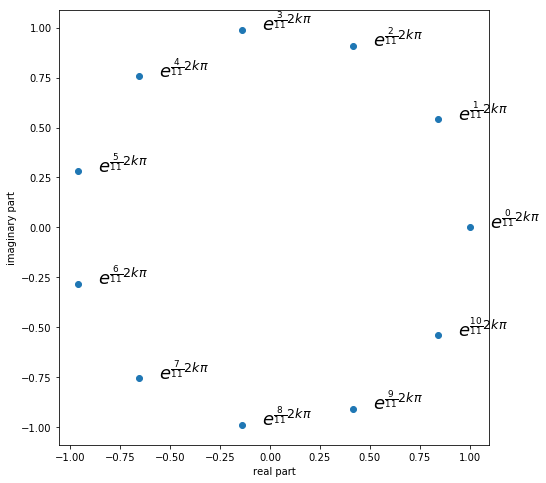

In [58]:
n = 11
roots = np.array([np.exp(2*k*np.pi*1j / n) for k in range(n)])

fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(np.real(roots), np.imag(roots), 'o')
[
    plt.text(
        np.cos(2*k*np.pi/n)+0.1, 
        np.sin(2*k*np.pi/n), 
        "$e^{\\frac{%d}{%d} 2 k \pi}$" % (k,n),
        size=18
    )
    for k in range(n)
]
ax.set_aspect(1)
ax.set_xlabel("real part");
ax.set_ylabel("imaginary part");

We can also come up with expressions for just $\cos$ and $\sin$. From 

$$
e^{i \theta} = \cos \theta + i \sin \theta ,
$$

we can get

\begin{eqnarray}
e^{-i \theta} & = & \cos (-\theta) + i \sin (-\theta) \\
              & = & \cos \theta - i \sin \theta
\end{eqnarray}

Adding these two equations together and solving for $\cos \theta$ gives

$$
\cos \theta = \frac{e^{i\theta} + e^{-i \theta}}{2} .
$$

Subtracting and solving for $\sin \theta$ gives

$$
\sin \theta = \frac{e^{i\theta} - e^{-i \theta}}{2i}.
$$

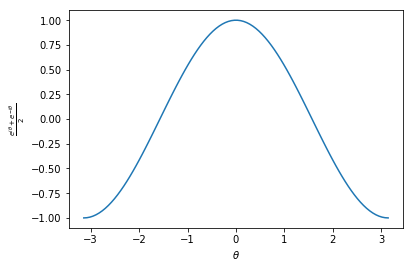

In [65]:
theta = np.linspace(-np.pi, np.pi, 100)
cos = (np.exp(1j*theta) + np.exp(-1j*theta))/2
plt.plot(theta, np.real(cos))
plt.xlabel("$\\theta$")
plt.ylabel("$\\frac{e^{i\\theta} + e^{-i \\theta}}{2}$");

The exponential thus gives a convenient way to express numbers of the form $z = a + bi$ in the form $r e^{i \theta}$ by noting that

$$
a + bi = |z| ( \cos \theta + i \sin \theta )
$$

where 

$$
|z| \sqrt{a^2+b^2}
$$

is the **magnitude** of $z$ and 

$$
\theta = \arctan(y,x)
$$

is called the **argument** of $z$, and is the angle that the vector $(a,b)^T$ makes with the real axis. 

**Example:** For example, if $z = -1 + i$ then 

$$
r = \sqrt{1^2 + 1^2} = \sqrt{2}
$$

and 

$$
\theta = \arctan(1,-1) = \frac{3\pi}{4}
$$

so that

$$
-1 + i = \sqrt{2}e^{\frac{3\pi}{4}i} .
$$

**Example:** The complex conjugate of $z = a + bi$ is $\overline{z} = a - b_i$. In terms of the exponential, we have

$$
\overline{r e^{i \theta}} = r e^{-i \theta} .
$$

It is clear then that $z \overline{z} = a^2 + b^2 = r^2 = re^{i \theta}re^{-i \theta}$.


In [38]:
# Two ways to get the magnitude 
abs(-1+sm.I), sm.Abs(-1+sm.I)

(√2, √2)

In [37]:
# Two ways to get the angle
sm.atan2(1,-1), sm.arg(-1+sm.I)

⎛3⋅π  3⋅π⎞
⎜───, ───⎟
⎝ 4    4 ⎠

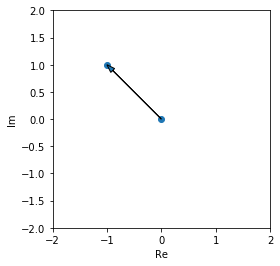

In [110]:
p = -1 + 1j
r = np.abs(p)
theta = np.arctan2(np.imag(p),np.real(p))
q = r * np.exp(1j*theta)
plt.arrow(0,0, np.real(q), np.imag(q), head_width=0.1,length_includes_head=True)
plt.scatter([0,np.real(p)],[0,np.imag(p)])
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("Re")
plt.ylabel("Im")
plt.gca().set_aspect(1)

# Fourier Series

### Periodic functions

In this section, we will be concerned only with **periodic** functions $f: \mathbb{R} \rightarrow \mathbb{R}$ in which there exists a $T$ such that

$$
f(t) = f(t+T)
$$

for all $t$. The smallest such $T$ is called the **period** of $f$. Without loss of generality, we can assume the period of the functions we are studying is $1$. This is because if $g$ is a function with period $T \neq 1$ we can define

$$
f(t) = g(Tt)
$$

then 

$$
f(t+1) = g(T(t+1)) = g(Tt + T) = g(Tt) = f(t) 
$$

has period 1.

### Sums of Sines and Cosines

The main question in Fourier Analysis is whether a periodic function can be written as a sum of sine waves with different amplitudes and frequencies. Such sums look like

$$
\sum_{n=1}^N A_n \sin(2 \pi n t + \phi_n)
$$

where $A_n$ is the amplitude of the $n$th harmonic wave form having frequency $n$, and $\phi_n$ is the phase. However, this is not very convenient for reasoning. Instead, Fourier looked at sums of the form

$$
\frac{a_0}{2} + \sum_{n=1}^N \left ( a_n \cos(2 \pi n t) + b_n \sin(2 \pi n t ) \right ) 
$$

where $a_n$ and $b_n$ are coefficients that we will need to find for any specific function.

However, even this form is not convenient either, especially in light of Euler's formula. Substituting in the exponential forms for sine and cosine, gives


$$
\frac{a_0}{2} + \sum_{n=1}^N \left ( a_n \frac{e^{2 \pi n t} + e^{-2 \pi n t}}{2} + b_n \frac{e^{2 \pi n t}- e^{-2 \pi n t}}{2i} \right ) 
$$

which can be rewritten

$$
\frac{a_0}{2} + 
\sum_{n=1}^N \left (
(a_n - i b_n) e^{2 \pi n t} + (a_n + i b_n) e^{-2 \pi n t}
\right ),
$$

which can be rewritten 

$$
\sum_{n=-N}^N c_n e^{2 \pi i n t},
$$

where $c_n = a_n - i b_n \in \mathbb{C}$ for $n > 0$. Also,

$$
c_{-n} = \overline{c_n} 
$$

and $c_0 = a_0/2$. 

The question now is when can a function be written as a weighted sum of terms of the form $e^{2 \pi i n t}$? It will turn out that you can for all reasonable periodic function, and that in fact:

> A realistic set of periodic functions forms a vector space with functions of the form $e^{2 \pi i n t}$ forming an orthonormal basis. 

We'll show this later.

### Functions with this form

Suppose that $f$ can be written as a sum of the above form. Then what are the coefficients of $c_k$ in terms of $f$. They can be found as follows. First, suppose that

$$
f(t) = \sum_{n=-N}^N c_n e^{2 \pi i n t}.
$$

Then we can multiply both sides by $e^{-2 \pi i k t}$ to get

$$
e^{-2 \pi i k t}f(t) = e^{-2 \pi i k t}\sum_{n=-N}^N c_n e^{2 \pi i n t}.
$$

The $k$th term of the right hand side is

$$
e^{-2 \pi i k t}c_ke^{2 \pi i k t} = c_k. 
$$

So we can solve for $c_k$ as

$$
c_k = e^{-2 \pi i k t}f(t) - \sum_{n=-N,k \neq k}^N c_n e^{-2 \pi i k t} e^{2 \pi i n t}.
$$

Now we apply a crucial observation, which is that when $n \neq k$ that

$$
\int_0^1 e^{-2 \pi i k t} e^{2 \pi i n t} dt = \int_0^1 e^{2 \pi i (n-k) t} dt = 0.
$$

Thus, integrating both sides of the above equation for $c_k$ gives

$$
c_k = \int_0^1 e^{-2 \pi i k t}f(t) dt.
$$

This is called the **$k$th Fourier coefficient** for $f$ and is usually denoted by

$$
\hat f(n) \triangleq c_n .
$$


**Note:** Since $f$ is periodic with period $1$, we can actually use any length 1 interval in the above argument. For example, we might use $[-\frac{1}{2},\frac{1}{2}]$. 

### The Space of Functions $L^2([0,1])$

We can come up with approximations of periodic functions this way, by assuming that in fact any function can be written this way as $N \rightarrow \infty$. In fact, the above is **the best** approximation with $2N+1$ terms by trigonometric functions of the function $f$. 

We define $L^2[0,1]$ to be the set of functions from $f : [0,1] \rightarrow \mathbb{C}$ such that

$$
\int_0^1 \left |f(t) \right|^2 dt < \infty.
$$

It turns out that for any function in $L^2[0,1]$ that

$$
f(t) = \sum_{n=-\infty}^\infty \hat f(n) e^{2 \pi int}.
$$

This is a fairly remarkable result. You may recall that we had a way of writing down any function with a Taylor series, but that required that we we able to take an arbitrary number of derivatives of that function. So discontinuous functions cannot be expressed as Taylor series. However, $L^2[0,1]$ is filed with discontinuous functions. For example, the square wave is discontinuous, but is exactly equal to the above Fourier series. And finite approximations of it show convergence, as the next example shows.

### Other periods

Note that if the period of $f$ is $T$ and not just $1$, then we have

$$
f(t) = \sum_{n=-\infty}^\infty c_n e^{2 \pi int / T}
$$

where 

$$
c_n = \frac{1}{T} \int_0^T e^{-2\pi int/T} f(t) dt .
$$

In [23]:
# Example: Square Wave
# f(t) = 1 if 0 <= t < 1/2 and -1 if 1/2 <= t < 1
# Note that the magnitude of the coefficients decreases like 1/n, showing that
# higher and higher frequencies contribute less and less to the overall shape.

t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)
q = -2*sm.pi*sm.I*n*t

A = sm.integrate(1*sm.exp(q),(t,0,sm.Rational(1,2))) 
B = sm.integrate((-1)*sm.exp(q),(t,sm.Rational(1,2),1))
fn=A+B
fn, sm.simplify(fn)

⎛             -ⅈ⋅π⋅n      -2⋅ⅈ⋅π⋅n    ⎛      n    ⎞⎞
⎜    ⅈ     ⅈ⋅ℯ         ⅈ⋅ℯ          ⅈ⋅⎝2⋅(-1)  - 2⎠⎟
⎜- ───── + ───────── - ───────────, ───────────────⎟
⎝  2⋅π⋅n      π⋅n         2⋅π⋅n          2⋅π⋅n     ⎠

In [5]:
vals = range(-28,29)
terms = [0 if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in vals]
terms

⎡        54⋅ⅈ⋅π⋅t          50⋅ⅈ⋅π⋅t          46⋅ⅈ⋅π⋅t          42⋅ⅈ⋅π⋅t       
⎢   2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅
⎢0, ─────────────, 0, ─────────────, 0, ─────────────, 0, ─────────────, 0, ──
⎣        27⋅π              25⋅π              23⋅π              21⋅π           

   38⋅ⅈ⋅π⋅t          34⋅ⅈ⋅π⋅t          30⋅ⅈ⋅π⋅t          26⋅ⅈ⋅π⋅t          22⋅
ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ   
───────────, 0, ─────────────, 0, ─────────────, 0, ─────────────, 0, ────────
   19⋅π              17⋅π              15⋅π              13⋅π              11⋅

ⅈ⋅π⋅t          18⋅ⅈ⋅π⋅t          14⋅ⅈ⋅π⋅t          10⋅ⅈ⋅π⋅t          6⋅ⅈ⋅π⋅t  
          2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ             2⋅ⅈ⋅ℯ         
─────, 0, ─────────────, 0, ─────────────, 0, ─────────────, 0, ────────────, 
π              9⋅π               7⋅π               5⋅π              3⋅π       

        2⋅ⅈ⋅π⋅t           -2⋅ⅈ⋅π⋅t            -6⋅

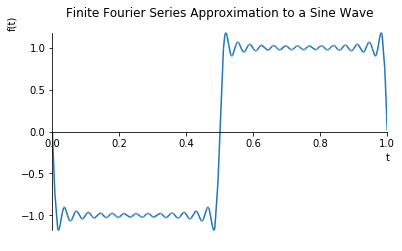

In [18]:
fapprox = sum(terms)
sm.plot(fapprox,(t,0,1),title="Finite Fourier Series Approximation to a Sine Wave");

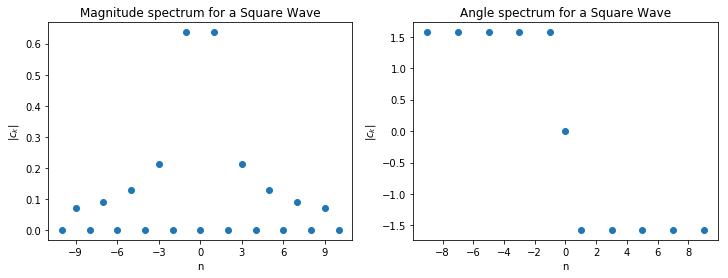

In [41]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
vals = range(-10,11)
ax[0].plot(vals,[0 if k == 0 else abs(fn.subs(n,k)) for k in vals],'o');
ax[0].set_title("Magnitude spectrum for a Square Wave")
ax[0].set_xlabel("n")
ax[0].set_ylabel("$|c_k|$");
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))

ax[1].plot(vals,[0 if k == 0 else sm.arg(fn.subs(n,k)) for k in vals],'o');
ax[1].set_title("Angle spectrum for a Square Wave")
ax[1].set_xlabel("n")
ax[1].set_ylabel("$|c_k|$")
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True));

# Vector Spaces Again

### The Vector Space $\mathbb{R}^n$

Recall that if ${\bf x} \in \mathbb{R}^n$ then the set of definitions for a vector space require a reasonable definition addition and multiplication, a zero and a one. They also imply a norm:

$$
||{\bf x}|| = \sqrt{x_1^2 + \dots + x_n^2} 
$$

and a dot product

$$
{\bf x} \cdot {\bf y} 
  = x_1 y_1 + \dots + x_n y_n. 
$$

We noted that if ${\bf x} \cdot {\bf y} = 0$ then ${\bf x}$ is said to be **orthogonal** or **perpendicular** to ${\bf y}$. 

If a set of vectors ${\bf x}_1$ ... ${\bf x}_n$ all have norm 1 and are pairwise orthogonal, that the set forms an **orthonormal** basis for $\mathbb{R}^n$. In particular, any vector in $\mathbb{R}^n$ can be written as a linear combination of the vectors in an orthonormal basis.

Some of the basic properties of norms are important:

- ${\bf x}\cdot {\bf x} \geq 0$ and $||{\bf x}|| = 0$ implies ${\bf x} = 0$.
- ${\bf x} \cdot {\bf y} = {\bf y} \cdot {\bf x}$
- $(a {\bf x}) \cdot {\bf y} = a({\bf x} \cdot {\bf y} )$
- $({\bf x} + {\bf y}) \cdot {\bf z} = {\bf x} \cdot {\bf z} + {\bf y} \cdot {\bf z}$.

Finally, it will be convenient going forward to use the notation

$$
({\bf x},{\bf y})
$$

for ${\bf x} \cdot {\bf y}$. 

### $L^2[0,1]$ as a vector space

Say that $f,g,h \in L^2[0,1]$. Then we can define something like a dot product, called the **inner product** by

$$
(f,g) = \int_0^1 f(t)\overline{g(t)} dt = 0.
$$

Then all of the above properties for real vectors also hold for these functions, In particular, 

- $(f,f) \geq 0$ and $(f,f) = 0$ implies $f = 0$.
- $(f,g)= (g,f)$
- $(af,g) = a(f,g)$
- $(f+g,h) = (f,h)+(g,h)$.

All of these properties should be clear from the definition. We also have function addition, scalar multiplication, a zero function ($f(t)=0$) and a one function ($f(t)=1$). Thus, $L^2[0,1]$ is a vector space!

What is an orthonormal basis for the elements of $L^2[0,1]$? It turns out that terms of the form $e^{2 \pi int}$ form the natural basis. This is because

\begin{eqnarray}
(e^{2 \pi int}, e^{2 \pi int}) & = & \int_0^n e^{2 \pi int}e^{2 \pi int} dt \\
& = & \int_0^n e^{2 \pi int}e^{- 2 \pi int} dt\\
& = & \int_0^1 1 dt \\
& = & 1
\end{eqnarray}

and when $n \neq m$,

\begin{eqnarray}
(e^{2 \pi int}, e^{2 \pi imt}) & = & \int_0^n e^{2 \pi int}e^{-2 \pi imt} dt \\
& = & \int_0^n e^{2 \pi i(n-m)t} dt \\
& = & \frac{1}{2 \pi i (n-m)} \left . e^{2 \pi i (n-m) t}  \right |_0^1 \\
& = & \frac{1}{2 \pi i (n-m)} ( 1 - 1 ) \\
& = & 0.
\end{eqnarray}

That, along with the fact (which we will not prove in this class) that every function in $L^2[0,1]$ can be written as

$$
f(t) = \sum_{n=-\infty}^\infty \hat f(n) e^{2 \pi int}
$$

shows that the functions $e^{2 \pi int}$ form an orthonormal basis. 

# Sound Synthesis

This section assumes you have the PyAudio Package installed. If you have conda, you can just do

    conda install pyaudio
    
at the command line.

In [132]:
import pyaudio
PyAudio = pyaudio.PyAudio
import struct
from scipy import signal

In [134]:
# Playing sounds that start and stop immediately causes the speakers to click. 
# This function is used to create an attack and decay for the sounds we will play.

def env(t,w,T=2):
    return np.piecewise(
        t,
        [t<w,
         t>w,
         t>=T-w],
        [lambda t: t/w,
         1, 
         lambda t:(T-t)/w])    

In [209]:
# This function takes a function and plays the resulting sound through the speakers.
# The function needs to take an np.array of times are return an array of values for the
# wave form.
def play(f,duration=2,bitrate=20000,attack=0.1):

    A = (2**15-1)
    t = np.linspace(0,duration,duration*bitrate)
    y = f(t)
    y = A * env(t,attack,T=duration) * y
    y = y.astype(np.int16)

    wave = b''
    for v in y:
        wave += struct.pack("h", v)

    p = PyAudio()
    stream = p.open(format = p.get_format_from_width(2), 
                    channels = 1, 
                    rate = bitrate, 
                    output = True,
                   )

    stream.write(wave)
    stream.stop_stream()
    stream.close()
    p.terminate()
    


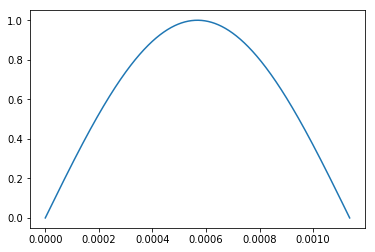

In [210]:
# A pure sine wave

def f(t):
    omega = 440
    return np.sin(2*np.pi*omega*t) 
play(f)

t = np.linspace(0,1/880,1000)
plt.plot(t,f(t));

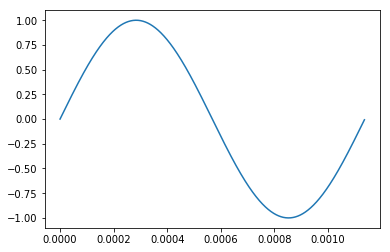

In [205]:
# Pitch changing

def f(t):
    omega = 880
    return np.sin(2*np.pi*omega*t / (t+1))
    
play(f)

t = np.linspace(0,1/880,1000)
plt.plot(t,f(t));

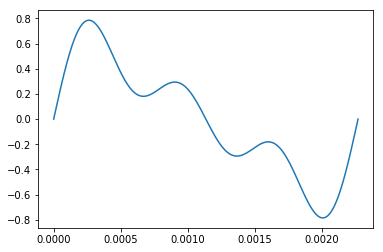

In [138]:
# Sine wave with harmonics
def f(t):
    omega = 440
    return 0.5*np.sin(2*np.pi*omega*t) + \
           0.25*np.sin(2*np.pi*(omega*2)*t) + \
           0.25*np.sin(2*np.pi*(omega*3)*t)
    
play(f)

t = np.linspace(0,1/440,1000)
plt.plot(t,f(t));

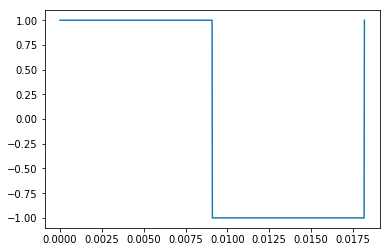

In [206]:
# Square wave: Note the noisy harmonics

def f(t):
    omega = 55
    return signal.square(2*np.pi*omega*t)
    
play(f)

t = np.linspace(0,1/55,1000)
plt.plot(t,f(t));

Text(0, 0.5, 'Frequency')

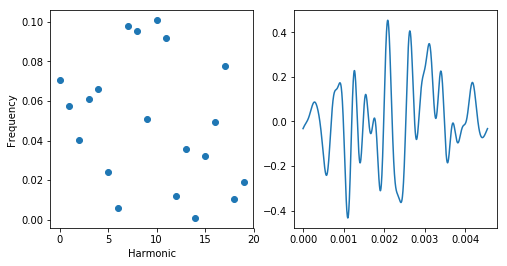

In [140]:
# Random wave form

N = 20  
a = np.array([np.random.rand() for _ in range(N)])
a = a / sum(a)
p = [np.random.rand()*2*np.pi for _ in range(N)]

def f(t):
    omega = 220
    w = [a[n]*np.sin(2*np.pi*n*omega*t+p[n]) for n in range(N)]
    return sum(w)
    
play(f)

fig,ax=plt.subplots(1,2,figsize=(8,4))
t = np.linspace(0,1/220,1000)
ax[0].plot(a,'o')
ax[1].plot(t,f(t))
ax[0].set_xlabel("Harmonic")
ax[0].set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

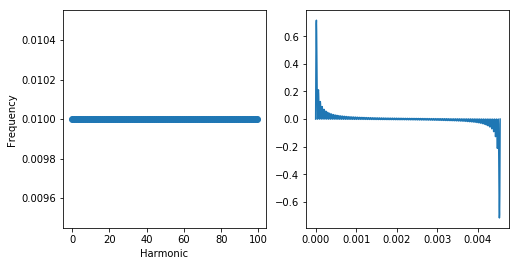

In [207]:
# Uniform wave form

N = 100
a = np.array([1 for _ in range(N)])
a = a / sum(a)
p = [0 for _ in range(N)]

def f(t):
    omega = 220
    w = [a[n]*np.sin(2*np.pi*n*omega*t+p[n]) for n in range(N)]
    return sum(w)
    
play(f)

fig,ax=plt.subplots(1,2,figsize=(8,4))
t = np.linspace(0,1/220,1000)
ax[0].plot(a,'o')
ax[1].plot(t,f(t))
ax[0].set_xlabel("Harmonic")
ax[0].set_ylabel("Frequency")

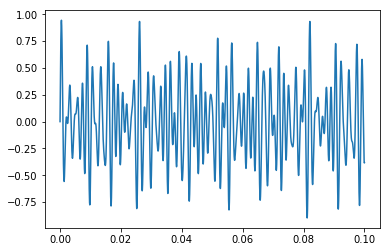

In [215]:
# G Minor 7

def f(t):
    return 0.25 * np.sin(2*np.pi*392*t)    + \
           0.25 * np.sin(2*np.pi*466.16*t) + \
           0.25 * np.sin(2*np.pi*587.33*t) + \
           0.25 * np.sin(2*np.pi*698.46*t)
    
play(f)

t = np.linspace(0,1/10,10000)
plt.plot(t,f(t));

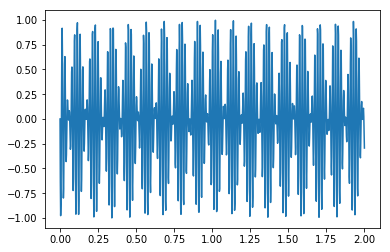

In [208]:
# Beating due to almost similar wave forms

def f(t):
    omega = 440
    return 0.5 * np.sin(2*np.pi*omega*t) + 0.5 * np.sin(2*np.pi*1.02*omega*t)
    
play(f)

t = np.linspace(0,2,1000)
plt.plot(t,f(t));

# The Fourier Transform

### Intuition

Consider the "blip" function 

$$
b(t) = \left \{
\begin{array}{l}
1 \; \mathrm{if} \; - \frac{1}{2} < t < \frac{1}{2} \\
0 \; \mathrm{else}.
\end{array}
\right .
$$

and its "periodized" form

$$
\tilde{b}(t) = \left \{
\begin{array}{l}
1 \; \mathrm{if} \; nT - \frac{1}{2} < t < nT + \frac{1}{2} \; \mathrm{for\;some\;n} \\
0 \; \mathrm{else}.
\end{array}
\right .
$$

The Fourier coefficients for this function are

\begin{eqnarray}
c_n & = & \frac{1}{T}\int_{0}^{T} e^{-2 \pi int/T} \tilde{b} dt \\
& = & \left . \frac{1}{T} \frac{1}{-2 \pi in/T} e^{2 \pi int/T} \right |_{t=-T/2}^{t=T/2} \\
& = & \frac{1}{2 \pi in}\left ( e^{\pi in/T} - e^{-\pi in/T}\right ) \\
& = & \frac{1}{\pi n} \sin \left ( \frac{\pi n}{T} \right ).
\end{eqnarray}

Plotting these terms shows a trend.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


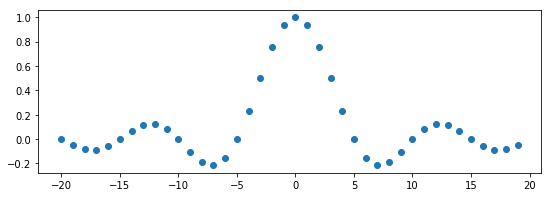

In [202]:
# Note that the terms are scaled by T in this plot.

fig,ax=plt.subplots(1,1,figsize=(9,3))
T = 5
n = np.array(range(-20,20))
c = T*(1/(n*np.pi))*np.sin(np.pi * n / T)
c[20] = 1
ax.plot(n,c,'o')

Clearly the coefficients are trending toward a function. Also, as the period $T$ gets bigger, $F$ in some sense tends toward $f$. This leads to the definition of the **Fourier transform:**

$$
\mathcal{F}f(s) = \int_{-\infty}^\infty e^{-2 \pi i s t} f(t) dt.
$$

where $s$plays the role of $n/T$ in the above discrete argument. Notice the similarity with the Fourier coefficient. 

Calculating the integral for the particular $f(t)$ above gives

$$
\mathcal{F}b(s) = \frac{\sin \pi s}{\pi s},
$$

which happens to be called the *sinc* function and which we plot below.

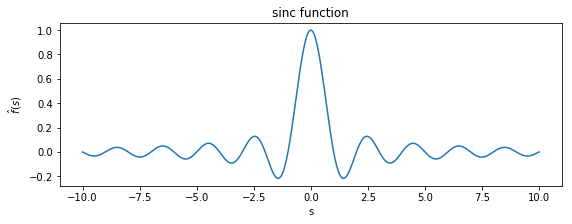

In [203]:
fig,ax=plt.subplots(1,1,figsize=(9,3))
s = np.linspace(-10,10,1000)
Fb = np.sin(np.pi*s) / (np.pi * s)
ax.plot(s,Fb);
ax.set_xlabel("s")
ax.set_ylabel("$\hat f(s)$")
ax.set_title("sinc function");

### Inverse Fourier Transform

The inverse of the Fourier transform is defined quite symmetrically by

$$
\mathcal{F}^{-1}g(t) = \int_{-\infty}^\infty  e^{2 \pi ist} g(s) ds.
$$


As we would hope, if you transform a function and then un-transform it, you should get it back. That is

$$\mathcal{F}^{-1}\mathcal{F}f = f$$

Although we haven't shown this formally.